# Car Prices

🎯 This exercise consists of the data preparation and feature selection techniques you have learnt today to a new dataset.

👇 Download the `ML_Cars_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv) and place it in the `data` folder.  Load into this notebook as a pandas dataframe named `df`, and display its first 5 rows.

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/ML_Cars_dataset.csv')
df.head(5)

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to use refer to it through the exercise.

# Duplicates

👇 Remove the duplicates from the dataset if there are any. Overwite the dataframe `df`.

In [8]:
df = df.drop_duplicates()
len(df)

191

# Missing values

👇 Locate missing values, investigate them, and apply the solutions below accordingly:

- Impute with most frequent
- Impute with median

Make changes effective in the dataset `df`.

In [9]:
df.isnull().sum()

aspiration         0
enginelocation    10
carwidth           2
curbweight         0
enginetype         0
cylindernumber     0
stroke             0
peakrpm            0
price              0
dtype: int64

In [10]:
df.enginelocation.value_counts()

front    179
rear       2
Name: enginelocation, dtype: int64

## `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations of missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since there is less than 30% of missing values.
</details> 

In [11]:
df.carwidth = df.carwidth.replace('*', np.nan)
df.carwidth = df.carwidth.replace(np.nan, df.carwidth.median())
df.carwidth

0      64.1
2      65.5
3      65.5
4      66.4
5      66.3
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: carwidth, Length: 191, dtype: object

## `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is front, impute with the most frequent.
</details>

In [12]:
df.enginelocation = df.enginelocation.replace(np.nan, 'front')

### ☑️ Test your code

In [13]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_carwidth PASSED   [ 50%]
tests/test_missing_values.py::TestMissing_values::test_engine_location PASSED [100%]

============================== 2 passed in 0.55s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


# Scaling

👇 Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scale
- Standard Scale

Replace the original columns by the transformed values.

In [14]:
df

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,65.5,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive


<AxesSubplot:>

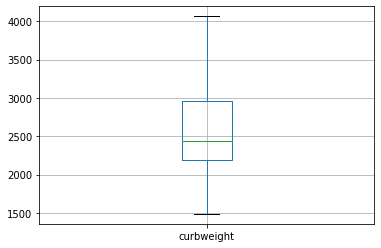

In [15]:
df[['curbweight']].boxplot()

## `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

In [16]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler() # Instanciate Robust Scaler

r_scaler.fit(df[['peakrpm']]) # Fit scaler to feature

df['peakrpm'] = r_scaler.transform(df[['peakrpm']]) #Scale

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,-0.142857,expensive
2,std,front,65.5,2823,ohcv,six,3.47,-0.142857,expensive
3,std,front,65.5,2337,ohc,four,3.40,0.571429,expensive
4,std,front,66.4,2824,ohc,five,3.40,0.571429,expensive
5,std,front,66.3,2507,ohc,five,3.40,0.571429,expensive


In [17]:
r_scaler.fit(df[['carwidth']]) # Fit scaler to feature

df['carwidth'] = r_scaler.transform(df[['carwidth']]) #Scale

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,2.68,-0.142857,expensive
2,std,front,0.000000,2823,ohcv,six,3.47,-0.142857,expensive
3,std,front,0.000000,2337,ohc,four,3.40,0.571429,expensive
4,std,front,0.333333,2824,ohc,five,3.40,0.571429,expensive
5,std,front,0.296296,2507,ohc,five,3.40,0.571429,expensive


In [18]:
r_scaler.fit(df[['stroke']]) # Fit scaler to feature

df['stroke'] = r_scaler.transform(df[['stroke']]) #Scale

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


## `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

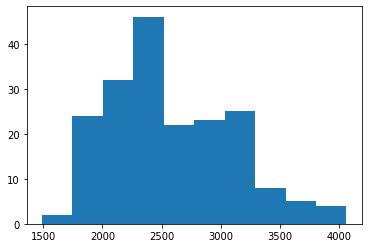

In [19]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.hist(df['curbweight']) # Check feature distribution

scaler = StandardScaler() # Instanciate StandarScaler

scaler.fit(df[['curbweight']]) # Fit scaler to data

df['curbweight'] = scaler.transform(df[['curbweight']]) # Use scaler to transform data

In [20]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


### ☑️ Test your code

In [21]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 4 items

tests/test_scaling.py::TestScaling::test_carwidth PASSED                 [ 25%]
tests/test_scaling.py::TestScaling::test_curbweight PASSED               [ 50%]
tests/test_scaling.py::TestScaling::test_peakrpm PASSED                  [ 75%]
tests/test_scaling.py::TestScaling::test_stroke PASSED                   [100%]

============================== 4 passed in 0.62s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


# Encoding

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features by their encoded version(s).

## `aspiration` & `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [22]:
from sklearn.preprocessing import OneHotEncoder

df.aspiration.unique() # Check unique values for streets (2)

ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instanciate encoder for binary feature

ohe.fit(df[['aspiration']]) # Fit encoder

df['aspiration'] = ohe.transform(df[['aspiration']]) # Encode Street

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


In [23]:
df.enginelocation.unique() # Check unique values for streets (2)

ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instanciate encoder for binary feature

ohe.fit(df[['enginelocation']]) # Fit encoder

df['enginelocation'] = ohe.transform(df[['enginelocation']]) # Encode Street

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


## `enginetype`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [24]:
df.enginetype.value_counts()

ohc      138
ohcf      14
ohcv      13
dohc      11
l         11
rotor      3
dohcv      1
Name: enginetype, dtype: int64

In [25]:
df.enginetype.unique()  # Check unique values for streets (3)

ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(df[['enginetype']]) # Fit encoder

alley_encoded = ohe.transform(df[['enginetype']]) # Encode alley

df["ohc"],df["ohcf"],df['ohcv'],df['dohc'],df['l'],df['rotor'],df['dohcv'] = alley_encoded.T # Transpose encoded Alley back into dataframe

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price,ohc,ohcf,ohcv,dohc,l,rotor,dohcv
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
df = df.drop(columns='enginetype')

## `cylindernumber`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded.
</details>

In [27]:
df.cylindernumber = df.cylindernumber.map({'four': 4,
                                          'six': 6,
                                          'five': 5,
                                          'eight': 8,
                                          'two': 2,
                                          'three': 3,
                                          'twelve': 12})
df

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,ohc,ohcf,ohcv,dohc,l,rotor,dohcv
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,1.259259,0.722416,4,-0.466667,0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,1.0,0.0,1.222222,0.907408,4,-0.466667,0.285714,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,0.0,0.0,1.259259,0.836844,6,-1.400000,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,1.0,0.0,1.259259,1.227807,6,0.366667,-0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [28]:
df.price.value_counts()

expensive    97
cheap        94
Name: price, dtype: int64

In [29]:
df.price.value_counts()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.price)
list(le.classes_)
df.price = le.transform(df.price)

### ☑️ Test your code

In [30]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 5 items

tests/test_encoding.py::TestEncoding::test_aspiration PASSED             [ 20%]
tests/test_encoding.py::TestEncoding::test_cylindernumber PASSED         [ 40%]
tests/test_encoding.py::TestEncoding::test_enginelocation PASSED         [ 60%]
tests/test_encoding.py::TestEncoding::test_enginetype PASSED             [ 80%]
tests/test_encoding.py::TestEncoding::test_price PASSED                  [100%]

============================== 5 passed in 0.33s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin 

# Collinearity

👇 Perform a collinearity investigation on the dataset and remove unecessary features. Make changes effective in the dataframe `df`.

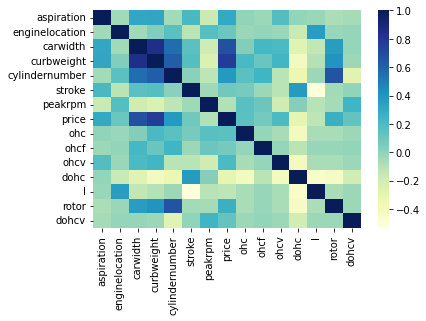

In [31]:
import seaborn as sns

# Heatmap
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");

In [32]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df
df.drop(columns=['dohcv', 'dohcv', 'ohcf', 'ohc', 'ohcv'], inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      191 non-null    float64
 1   enginelocation  191 non-null    float64
 2   carwidth        191 non-null    float64
 3   curbweight      191 non-null    float64
 4   cylindernumber  191 non-null    int64  
 5   stroke          191 non-null    float64
 6   peakrpm         191 non-null    float64
 7   price           191 non-null    int64  
 8   dohc            191 non-null    float64
 9   l               191 non-null    float64
 10  rotor           191 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 17.9 KB


In [34]:
corr_df[(corr_df['correlation'] < 0.1) & (corr_df['correlation'] > -0.1)]

,feature_1,feature_2,correlation
99,peakrpm,ohcf,0.098177
141,ohcf,peakrpm,0.098177
110,price,stroke,0.085292
82,stroke,price,0.085292
114,price,ohcf,0.071417
...,...,...,...
13,aspiration,rotor,-0.074272
193,l,rotor,-0.076004
207,rotor,l,-0.076004
111,price,peakrpm,-0.093893


ℹ️ Out of the highly correlated feature pairs, remove the one with less granularity.

### ☑️ Test your code

In [35]:
from nbresult import ChallengeResult

result = ChallengeResult('collinearity',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_collinearity.py::TestCollinearity::test_removed_highly_correlated_features PASSED [100%]

============================== 1 passed in 0.43s ===============================


💯 You can commit your code:

git add tests/collinearity.pickle

git commit -m 'Completed collinearity step'

git push origin master


# Base Modelling

👇 Cross validate a Logistic regression model. Save its score under variable name `base_model_score`.

In [36]:
df

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,l,rotor
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,1,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,1,0.0,0.0,1.0
3,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,1,1.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,1,1.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,1.259259,0.722416,4,-0.466667,0.428571,1,1.0,0.0,0.0
201,1.0,0.0,1.222222,0.907408,4,-0.466667,0.285714,1,1.0,0.0,0.0
202,0.0,0.0,1.259259,0.836844,6,-1.400000,0.571429,1,0.0,0.0,1.0
203,1.0,0.0,1.259259,1.227807,6,0.366667,-0.428571,1,1.0,0.0,0.0


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

target_encoder = LabelEncoder().fit(df['price']) # Fit target encoder

y = target_encoder.transform(df['price']) # Encode target

X = df.drop(columns=['price'])# Create feature set

log_reg = LogisticRegression() # Instanciate model

scores = cross_val_score(log_reg, X, y, cv=10) # Cross validate

base_model_score = scores.mean()

base_model_score

0.8692105263157895

### ☑️ Test your code

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


# Feature Selection

👇 Perform feature permutation to remove the weak features from the feature set. With that strong feature set, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [39]:
from sklearn.inspection import permutation_importance
import numpy as np

log_model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(log_model, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
3,curbweight,0.297906
2,carwidth,0.125131
5,stroke,0.03822
6,peakrpm,0.024607
8,l,0.02199
7,dohc,0.018848
0,aspiration,0.009424
4,cylindernumber,0.003141
9,rotor,0.000524
1,enginelocation,0.0


In [40]:
df.drop(columns='rotor', inplace=True)

In [41]:
target_encoder = LabelEncoder().fit(df['price']) # Fit target encoder

y = target_encoder.transform(df['price']) # Encode target

X = df.drop(columns=['price'])# Create feature set

log_reg = LogisticRegression() # Instanciate model

scores = cross_val_score(log_reg, X, y, cv=10) # Cross validate

strong_model_score = scores.mean()

strong_model_score

0.8692105263157895

### ☑️ Test your code

In [42]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_strong_model.py::TestStrong_model::test_strong_model_score PASSED [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master


# 🏁